In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd



In [2]:

def debugger(list_of_variables, list_of_variable_names):

    for i in range(len(list_of_variables)):

        variable_value = list_of_variables[i]
        variable_name = list_of_variable_names[i]

        print(f'Variable name:{variable_name}, Value:{variable_value}')

In [3]:

# Defining Malfliet-Tjon potential

def potential_V(r):
    
    # Realistik nukleon-nukleon potential of Malfliet-Tjon type.
    # Ref: R. A. Malfliet and J.A. Tjon
    # Nuclear Physics A127 (1969) 161-168
    
    # input: Radius r in 10^-15 m or 1 fm 
    # Output: Potential V in MeV
    
    
    l_1 = -586.04
    l_2 = 1458.19
    l_3 = -872.15
    
    mu_1 = 1.55
    mu_2 = 3.11
    mu_3 = 6.00
    
    V_1 = l_1*np.exp(-mu_1*r)
    V_2 = l_2*np.exp(-mu_2*r)
    V_3 = l_3*np.exp(-mu_3*r)
    
    V = (V_1+V_2+V_3)/r
    
    return V



In [8]:

# Populating Vr vector
def populate_Vr(Vr, r):
    
    for i in range(Vr.size):
    
        Vr[i] = potential_V(r[i])

    return Vr


In [5]:
def populate_Fvec(Fvec, Vr, E):
    
    # Mass of protron in MeV/c^2
    mass_protron = 938.272
    # Mass of neutron in MeV/c^2
    mass_neutron = 939.565
    # Reduced mass of the deutron
    my = (mass_protron*mass_neutron) / (mass_protron+mass_neutron)
    # hbar*c = 197.327 MeV*fm
    hbar = 197.327
    # The c cancels out from the MeV/c^2 unit of my
    K = 2 * my / hbar**2
    
    
    for i in range(Fvec.size):
    
        Fvec[i] = K*(Vr[i]-E)
    
    return Fvec
    

In [6]:

def numerov(u, Fvec, u_0, u_1, index, steplength, revese=False):
    
    #TODO: Python magic? Revers the u vector, calculate and revers back? 
    
    if revese:
        u = u[::-1]
    
    # Init outward integrated wave function
    u[0] = u_0
    u[1] = u_1
    h = steplength
    # Numverov outward
    for i in range(1,index):
        
        u_0 = u[i]
        u_neg_1 = u[i-1]
        
        F_1 = Fvec[i+1]
        F_0 = Fvec[i]
        F_neg_1 = Fvec[i-1]
        
        
        
        #print('Debugger')
        #print(f'u_0: {u_0}')
        #print(f'u_neg_1: {u_neg_1}')
        #print(f'F_1: {F_1}')
        #print(f'F_0: {F_0}')
        #print(f'F_neg_1: {F_neg_1}')
        
        outward_numerator = u_0*(2 + (5/6)*(h**2)*F_0) - u_neg_1*(1 - (1/12)*(h**2)*F_neg_1)
        outward_denominator = (1 - (1/12)*(h**2)*F_1)
        next_step = outward_numerator/outward_denominator
        u[i+1] = next_step
        
        #print(f'outward_numerator: {outward_numerator}')
        #print(f'outward_denominator: {outward_denominator}')
        #print(f'next_step: {next_step}')

    if revese:
        return u[::-1]

    else:
        return u


In [ ]:
# Declaring constants

# Grid in fm
rmax = 10.0
# Number of steps
N = 10000
# Step lengt
h = rmax / N

print(f'Steplengt: {h}')

# Init grid and potential V(r) for every r
# OBS: Never use 0
r = np.linspace(10.**-16, rmax, num=(N))
Vr = populate_Vr(np.zeros(N))
u = np.zeros(N)


Steplengt: 0.001
[ 2.27373675e+03  1.59696378e+03  1.58768512e+03 ... -1.09092761e-05
 -1.08912886e-05 -1.08733310e-05]


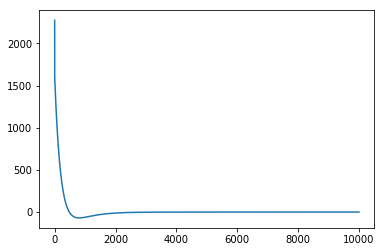

In [78]:

# Declaring constants

# Grid in fm
rmax = 10.0
# Number of steps
N = 10000
# Step lengt
h = rmax / N

print(f'Steplengt: {h}')

# Init grid and potential V(r) for every r
# OBS: Never use 0
r = np.linspace(10.**-16, rmax, num=(N))

u = np.zeros(N)
Vr = populate_Vr(np.zeros(N))

print(Vr)

plt.plot(Vr)

# Vector Vr is tested and looks good. populate_Vr working as expected. 


[55.66542144 39.34626624 39.12252816 ...  0.83837536  0.83837536
  0.83837536]


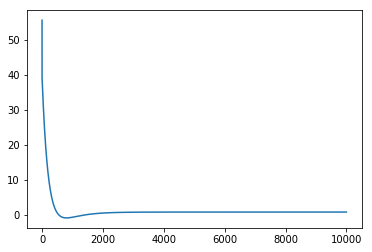

In [99]:


Emin = min(Vr)
Emax = 0.0
E = 0.5 * (Emin+Emax)
max_iter = 1# TODO:
continuity_epsilon = 1# TODO:

rmp_index = 1000

Fvec = populate_Fvec(np.zeros(N), Vr, E)

print(Fvec)

plt.plot(Fvec)

# Vector Fvec new tested and correct. 


[0.         0.         0.         ... 0.00200004 0.001      0.        ]
[0.         0.001      0.00200004 ... 0.         0.         0.        ]


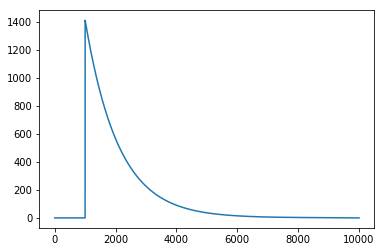

In [130]:

rmp_index = 1000

u_outer = numerov(np.zeros(N), Fvec, 0, h**1, rmp_index, h)
#plt.plot(u_outer)

u_inner = numerov(np.zeros(N), Fvec, 0, h**1, (N - rmp_index - 2), h, revese=True)
plt.plot(u_inner)


print(u_inner)
print(u_outer)



[0.         0.001      0.00200004 ... 0.00200004 0.001      0.        ]


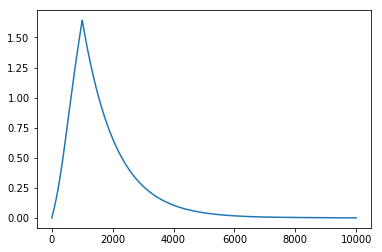

In [131]:
u_in_mp = u_inner[rmp_index+1]
u_out_mp = u_outer[rmp_index]
    
# Scaling factor between ingoing and outgoing wave function
scalefactor = u_out_mp/u_in_mp

plt.plot((scalefactor*u_inner+u_outer))


print(u_inner+u_outer)

# numerov are now tested

In [132]:

rmp_index = 1000

# Init outward integrated wave function
u_outer = numerov(np.zeros(N), Fvec, 0, h**1, rmp_index, h)
u_out_mp = u[rmp_index]


# Init inward integrated wave function
u_inner = numerov(np.zeros(N), Fvec, 0, h**1, (N - rmp_index - 2), h, revese=True)
u_in_mp = u[rmp_index+1]

# Scaling factor between ingoing and outgoing wave function
scalefactor = u_out_mp/u_in_mp
    
# Match the height and create the full vector u
u = u_outer + scalefactor * u_inner


# Calculate the discontinuity of the derivitiv of mp
# TODO: Figure out if i need the index here of the value of r?
matching_numerator = (u[rmp_index]-h)+(u[rmp_index]+h) - u[rmp_index]*(2 + (h**2)*Fvec[rmp_index])
matching_denominator = h
matching = matching_numerator / matching_denominator

print(matching)


0.0010591348464927819


In [135]:
# Set important parameters
# Guessing whatever was meintioned in the exercise
Emin = min(Vr)
Emax = 0.0
E = 0.5 * (Emin+Emax)
max_iter = 10000# TODO:
continuity_tolerance = 0.0001# TODO:

Steplengt: 0.001
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5001250062503124
Match r=2.5

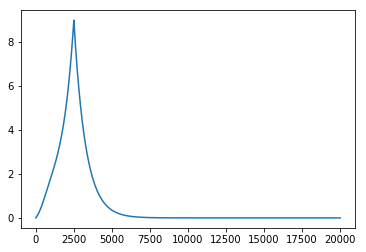

In [55]:

# Declaring constants

# Grid in fm
r_max = 20.0
# Number of steps
N = 20000
# Step lengt
h = r_max / N

print(f'Steplengt: {h}')

# Init grid and potential V(r) for every r
# OBS: Never use 0
r = np.linspace(10.**-16, r_max, num=N)
Vr = populate_Vr(np.zeros(N), r)
u = np.zeros(N)
df = pd.DataFrame()

# Set important parameters
# Guessing whatever was meintioned in the exercise
Emin = min(Vr)
Emax = 0.0
E = 0.5 * (Emin+Emax)
max_iter = 100
continuity_tolerance = 0.001
rmp_index = 2500

# Itterate over the energi E

for iter in range(max_iter):


    # Init Fvec(r)
    # This vector is dependent on E
    Fvec = populate_Fvec(np.zeros(N), Vr, E)

    # Choose matching point (equvivalent grid index)
    # In exercise suggested to start at 1fm
    rmp_index = rmp_index

    print(f'Match r={r[rmp_index]}')

    # Init outward integrated wave function
    u_outer = numerov(np.zeros(N), Fvec, 0, h ** 1, rmp_index, h)
    u_out_mp = u_outer[rmp_index]
    df['u_outer'] = u_outer

    # Init inward integrated wave function
    u_inner = numerov(np.zeros(N), Fvec, 0, h ** 1, (N - rmp_index - 2), h, revese=True)
    u_in_mp = u_inner[rmp_index + 1]
    df['u_inner'] = u_inner

    # Scaling factor between ingoing and outgoing wave function
    scale_factor = u_out_mp / u_in_mp

    # Match the height and create the full vector u
    u = u_outer + scale_factor * u_inner

    df['u'] = u

    # Calculate the discontinuity of the derivitiv of mp
    #matching_numerator = (u[rmp_index] - h) + (u[rmp_index+1] + h) - u[rmp_index] * (2 + (h ** 2) * Fvec[rmp_index])
    #matching_denominator = h
    #matching = matching_numerator / matching_denominator
    
    dx = np.gradient(u, h)
    df['dx'] = dx 
    u_outer_dx = dx[rmp_index]
    u_inner_dx = dx[rmp_index+1]
    matching = (u_inner_dx - u_outer_dx) 

    if abs(matching) < continuity_tolerance:
        # Break the loop
        print('Within tolerance!')
        break

    if u[rmp_index] * matching > 0:
        
        Emax = E

    else:
        
        Emin = E

    # Calculating E for the next iteration.
    E = 0.5 * (Emax + Emin)
    

# Debugging
print('Testing')
debugger([E, continuity_tolerance, matching], ['E', 'continuity_tolerance', 'matching'])

plt.plot(u)


Steplengt: 0.001
Match r=2.1001050052502626


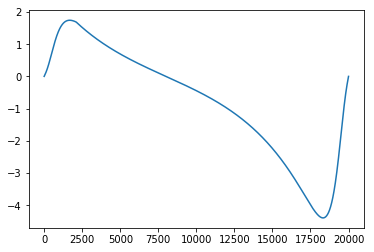

In [60]:

# Declaring constants

# Grid in fm
r_max = 20.0
# Number of steps
N = 20000
# Step lengt
h = r_max / N

print(f'Steplengt: {h}')

# Init grid and potential V(r) for every r
# OBS: Never use 0
r = np.linspace(10.**-16, r_max, num=N)
Vr = populate_Vr(np.zeros(N), r)
u = np.zeros(N)
df = pd.DataFrame()

# Set important parameters
# Guessing whatever was meintioned in the exercise
Emin = min(Vr)
Emax = 0.0
E = 0.5 * (Emin+Emax)
max_iter = 100
continuity_tolerance = 0.001
rmp_index = 2100

E = -2.2

# Init Fvec(r)
# This vector is dependent on E
Fvec = populate_Fvec(np.zeros(N), Vr, E)

# Choose matching point (equvivalent grid index)
# In exercise suggested to start at 1fm
rmp_index = rmp_index

print(f'Match r={r[rmp_index]}')

# Init outward integrated wave function
u_outer = numerov(np.zeros(N), Fvec, 0, h ** 1, rmp_index, h)
u_out_mp = u_outer[rmp_index]
df['u_outer'] = u_outer

# Init inward integrated wave function
u_inner = numerov(np.zeros(N), Fvec, 0, h ** 1, (N - rmp_index - 2), h, revese=True)
u_in_mp = u_inner[rmp_index + 1]
df['u_inner'] = u_inner

# Scaling factor between ingoing and outgoing wave function
scale_factor = u_out_mp / u_in_mp

# Match the height and create the full vector u
u = u_outer + scale_factor * u_inner

df['u'] = u
# Calculate the discontinuity of the derivitiv of mp
#matching_numerator = (u[rmp_index] - h) + (u[rmp_index+1] + h) - u[rmp_index] * (2 + (h ** 2) * Fvec[rmp_index])
#matching_denominator = h
#atching = matching_numerator / matching_denominator
    
dx = np.gradient(u, h)
df['dx'] = dx 
u_outer_dx = dx[rmp_index]
u_inner_dx = dx[rmp_index+1]
matching = (u_inner_dx - u_outer_dx)


plt.plot(u)